In [6]:
import torch
import pycocotools.coco

from torchvision.datasets import CocoDetection
from torchvision import transforms

# Define the path to the COCO dataset directory
data_dir = '/home/jovyan/torch/banana'

# Define the transforms to apply to the images
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to tensor
])

# Create a CocoDetection dataset instance
coco_dataset = CocoDetection(root=data_dir+'/images', annFile=data_dir + '/annotations/instances_Train.json', transform=transform)

ModuleNotFoundError: No module named 'pycocotools'

In [2]:
sample = coco_dataset[0]
img, target = sample
print(f"{type(img) = }\n{type(target) = }\n{type(target[0]) = }\n{target[0].keys() = }")

type(img) = <class 'torch.Tensor'>
type(target) = <class 'list'>
type(target[0]) = <class 'dict'>
target[0].keys() = dict_keys(['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox', 'iscrowd', 'attributes'])


In [32]:
from torchvision.datasets import wrap_dataset_for_transforms_v2

dataset = wrap_dataset_for_transforms_v2(coco_dataset)
print("Number of samples in the dataset:", len(dataset))

print("Type of dataset object:", type(dataset))
print("Attributes and methods of dataset object:", dir(dataset))

for i in range(len(dataset)):
    sample = dataset[i]
    image = sample
    print(image)

Number of samples in the dataset: 45
Type of dataset object: <class 'torchvision.tv_tensors._dataset_wrapper.WrappedCocoDetection'>
Attributes and methods of dataset object: ['__add__', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_dataset', '_format_transform_repr', '_is_protocol', '_load_image', '_load_target', '_repr_indent', '_target_keys', '_wrapper', 'extra_repr', 'target_transform', 'transform', 'transforms']
(<PIL.Image.Image image mode=RGB size=4000x1800 at 0x7F826A910E10>, {'image_id': 1, 'boxes': BoundingBoxes([[3277.8401,  575.0100, 354

In [28]:
# Iterate through the dataset to access annotations
for i in range(len(coco_dataset)):
    image, annotations = coco_dataset[i]

    # Extract bounding boxes from annotations
    boxes = [ann['bbox'] for ann in annotations]

    # Print the bounding boxes
    print(f"Sample {i+1} Bounding Boxes:")
    for box in boxes:
        print("  ", box)

Sample 1 Bounding Boxes:
   [3277.84, 575.01, 264.66, 139.89]
   [2272.36, 627.57, 383.2, 181.58]
   [1863.86, 975.77, 483.93, 306.23]
   [1518.45, 1388.89, 506.9, 268.59]
   [2768.98, 476.4, 350.6, 221.85]
Sample 2 Bounding Boxes:
   [1325.71, 980.58, 647.01, 257.2]
   [2219.24, 1040.04, 676.75, 321.36]
   [251.77, 1280.5, 506.83, 311.44]
   [1296.75, 650.62, 359.17, 192.82]
   [567.07, 903.93, 574.67, 257.09]
Sample 3 Bounding Boxes:
   [2483.89, 775.39, 204.16, 241.96]
   [2030.21, 650.62, 257.09, 238.19]
   [2949.12, 1359.9, 634.2, 307.67]
   [2793.91, 1085.41, 400.76, 238.18]
   [1076.13, 1000.76, 713.45, 302.52]
Sample 4 Bounding Boxes:
   [2588.7, 405.8, 446.4, 584.9]
   [898.38, 533.11, 924.08, 462.65]
Sample 5 Bounding Boxes:
   [2001.35, 337.73, 824.36, 342.86]
   [1605.55, 824.29, 2321.85, 794.11]
   [153.45, 852.02, 1406.72, 632.77]
Sample 6 Bounding Boxes:
   [1489.58, 761.26, 1114.29, 274.79]
   [1522.35, 380.59, 529.42, 360.5]
   [2117.31, 1078.91, 942.86, 506.72]
Sample

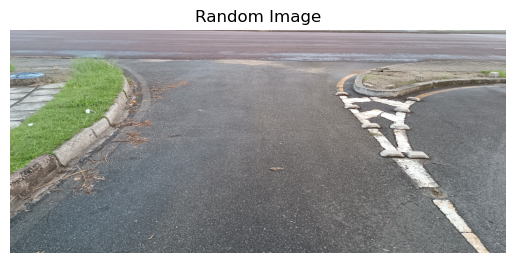

In [46]:
import matplotlib.pyplot as plt
import random

size = len(coco_dataset)
rand = random.randint(0, size)

for i in range(size):
    image, annotations = coco_dataset[i]
    
    # Convert PIL image to NumPy array
    image_np = image

    if (i == rand):
        # Plot the image
        plt.imshow(image_np)  
        plt.axis('off')  
        plt.title('Random Image')  
        plt.show()  

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# data loader
batch_size = 1
num_workers = 4

size = len(coco_dataset)
rand = random.randint(0, size)


data_loader = torch.utils.data.DataLoader(coco_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=num_workers
                                         )


for i in range(size):
    image, annotations = coco_dataset[i]
    
    # Plot the image
    img = transforms.ToPILImage()(image)
    plt.axis('off')  
    plt.title('Random Image')  
    plt.show()  
        


TypeError: pic should be Tensor or ndarray. Got <class 'PIL.Image.Image'>.

In [47]:
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

# load a pre-trained model for classification and return
# only the features
backbone = torchvision.models.mobilenet_v2(weights="DEFAULT").features
# ``FasterRCNN`` needs to know the number of
# output channels in a backbone. For mobilenet_v2, it's 1280
# so we need to add it here
backbone.out_channels = 1280

# let's make the RPN generate 5 x 3 anchors per spatial
# location, with 5 different sizes and 3 different aspect
# ratios. We have a Tuple[Tuple[int]] because each feature
# map could potentially have different sizes and
# aspect ratios
anchor_generator = AnchorGenerator(
    sizes=((32, 64, 128, 256, 512),),
    aspect_ratios=((0.5, 1.0, 2.0),)
)

# let's define what are the feature maps that we will
# use to perform the region of interest cropping, as well as
# the size of the crop after rescaling.
# if your backbone returns a Tensor, featmap_names is expected to
# be [0]. More generally, the backbone should return an
# ``OrderedDict[Tensor]``, and in ``featmap_names`` you can choose which
# feature maps to use.
roi_pooler = torchvision.ops.MultiScaleRoIAlign(
    featmap_names=['0'],
    output_size=7,
    sampling_ratio=2
)

# put the pieces together inside a Faster-RCNN model
model = FasterRCNN(
    backbone,
    num_classes=2,
    rpn_anchor_generator=anchor_generator,
    box_roi_pool=roi_pooler
)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /home/jovyan/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 73.6MB/s]


In [48]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor


def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")

    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(
        in_features_mask,
        hidden_layer,
        num_classes
    )

    return model

In [49]:
from torchvision.transforms import v2 as T


def get_transform(train):
    transforms = []
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    transforms.append(T.ToDtype(torch.float, scale=True))
    transforms.append(T.ToPureTensor())
    return T.Compose(transforms)

In [ ]:
import utils


model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
dataset = PennFudanDataset('data/PennFudanPed', get_transform(train=True))
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=2,
    shuffle=True,
    num_workers=4,
    collate_fn=utils.collate_fn
)

# For Training
images, targets = next(iter(data_loader))
images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]
output = model(images, targets)  # Returns losses and detections
print(output)

# For inference
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)  # Returns predictions
print(predictions[0])